In [1]:
%%time
# Imports
from utils import *

CPU times: total: 1.83 s
Wall time: 7.43 s


File-Reading

In [2]:
%%time

# Get start time
start = time.perf_counter()

# File-Reading
path = os.path.join(os.getcwd() , out_file) # from utils
# user = []
ts = []
# ca = []
tweets = []
# mentions = []
# coord = []
country = []

with open(path , 'r' , encoding='utf-8') as in_file:
    csv_reader = csv.reader(in_file , delimiter = "|")
    for line in csv_reader:
        # user.append(line[0])
        ts.append(line[1])
        # ca.append(line[2])
        tweets.append(line[3])
        # mentions.append(line[4])
        # coord.append(line[5])
        country.append(line[6])

ts_convert = [datetime.datetime.fromtimestamp(int(dt)//1000) for dt in ts]

CPU times: total: 33.6 s
Wall time: 34.2 s


### **QUESTION 1**

Identify 3 days with unusually high activity in 3 different countries of your choosing. For example you could choose one day in the UK, one in France and one in Turkey. Describe and justify how you identify ‘unusual’ days.

In [3]:
twt_df = pd.DataFrame(
    list(zip(tweets , ts_convert , country)),
    columns = ['tweet_id' , 'ts' , 'country']
)

twt_df = twt_df[twt_df['tweet_id']!="None"].drop_duplicates()
len(twt_df)

15033548

In [4]:
# https://www.kaggle.com/datasets/prasertk/country-name-in-different-languages
country_codes = pd.read_csv(
    os.path.join(
        os.getcwd() , 'country name in different languages.csv'
        )
    )

# Let's randomly decide on 3 countries for now.
country_list = ['United Kingdom' , 'France' , 'Germany']

# Let's get these countries and the different names they're called by!
restricted_country_names = country_codes[country_codes['en'].isin(country_list)].drop('country_code' , axis = 1)
pivoted_country_names = pd.melt(
    restricted_country_names, id_vars=['en'], var_name='language', value_name='name'
    )[['en' , 'name']].drop_duplicates()

# English names are being left out - add them back in
english_names = []
for c in country_list:
    english_names.append([c , c])

english_name_df = pd.DataFrame(english_names , columns = ['en' , 'name'])
pivoted_country_names = pd.concat([pivoted_country_names , english_name_df] , axis = 0).drop_duplicates()

In [5]:
restricted_country_df = twt_df.merge(pivoted_country_names , left_on = 'country' , right_on = 'name' , how = 'inner')
restricted_country_df = restricted_country_df[['tweet_id' , 'ts' , 'en']]#.dropna()

# Create a date column
restricted_country_df['ts_day'] = pd.to_datetime(restricted_country_df['ts']).dt.date
# restricted_country_df.count()

# Group at day level
res_country_grp = restricted_country_df.groupby(['ts_day','en']).agg(num_twt = ('tweet_id' , 'nunique')).reset_index().set_index('ts_day')

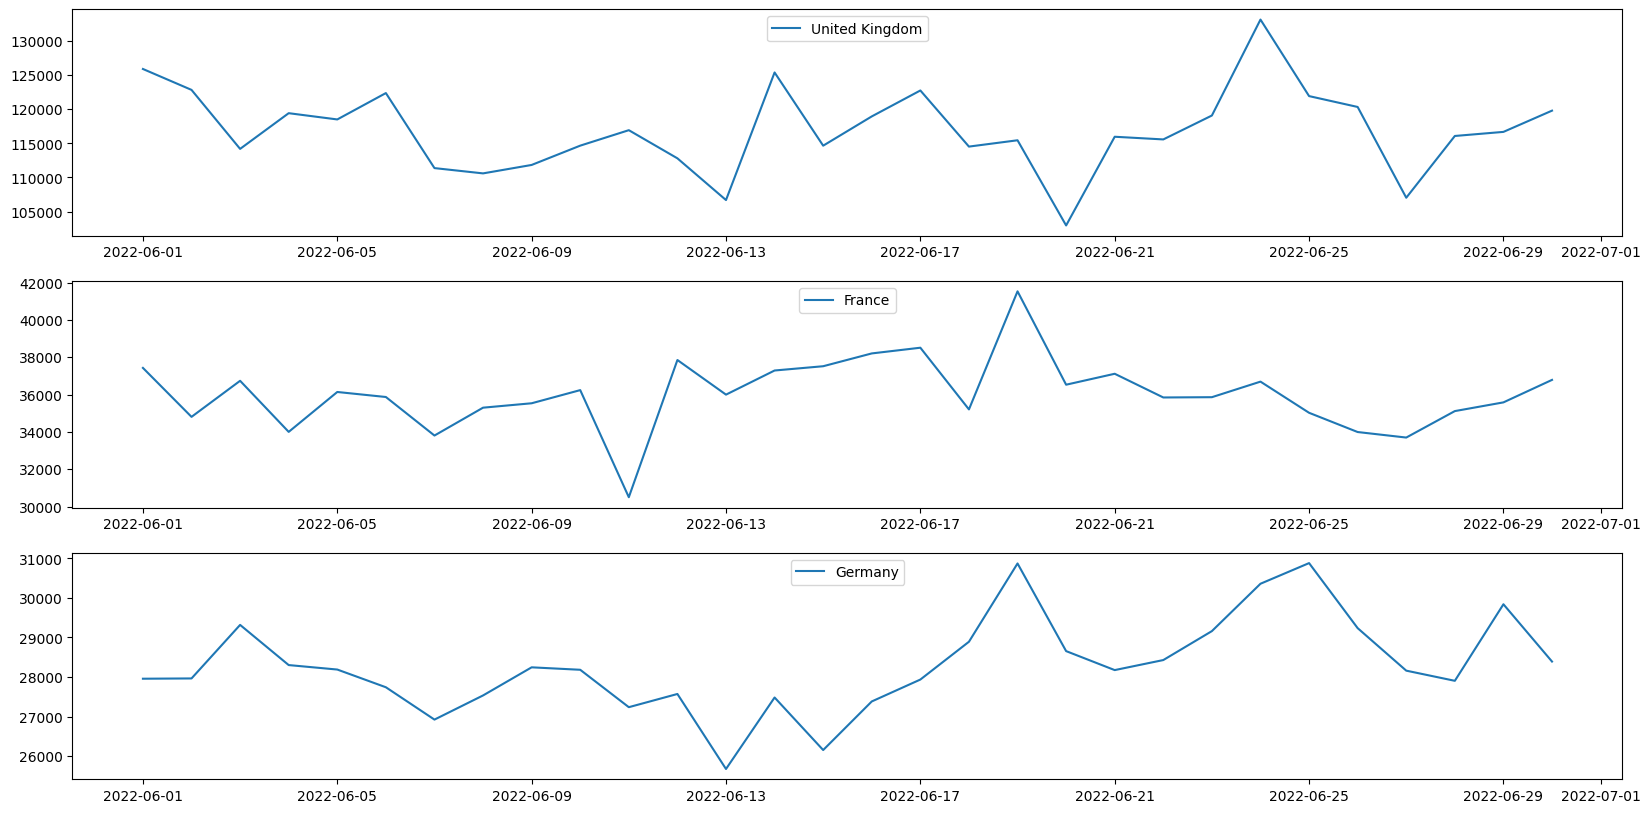

In [6]:
# Plot - Add axis labels, title
fig , axes = plt.subplots(len(country_list) , 1 , figsize = (20,10))
for _ , (ax , country) in enumerate(zip(axes , country_list)):
    df = res_country_grp[res_country_grp['en']==country][['num_twt']]
    ax.plot(df , label = country)
    ax.legend(loc = 'upper center')

In [7]:
ts_1 = res_country_grp[res_country_grp['en']==country_list[0]].num_twt.rename(country_list[0])
ts_2 = res_country_grp[res_country_grp['en']==country_list[1]].num_twt.rename(country_list[1])
ts_3 = res_country_grp[res_country_grp['en']==country_list[2]].num_twt.rename(country_list[2])

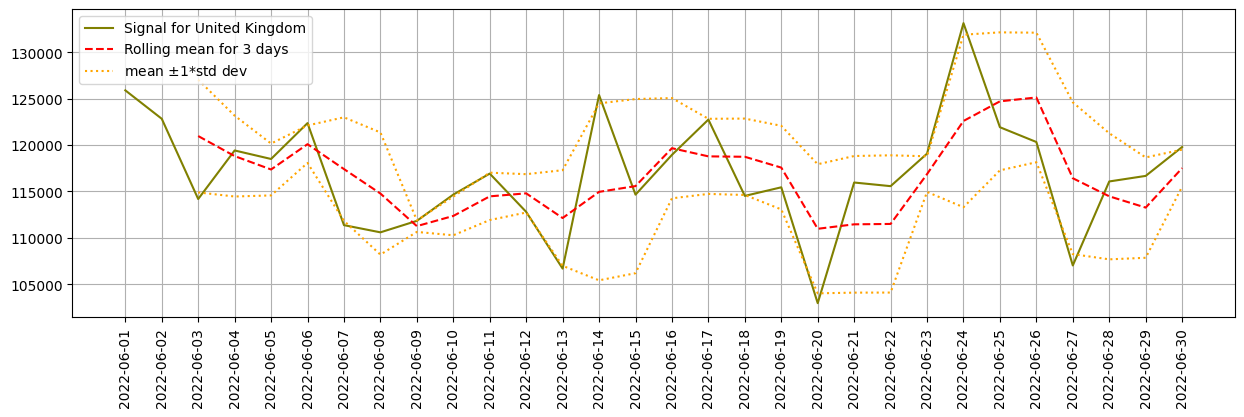

In [8]:
# Anomaly Detection using Bollinger Bands-adjacent method
fig , ax = plt.subplots(figsize = (15,4))

rate = 3
tolerance = 1
ax.plot(ts_1 , c = 'olive' , label = f'Signal for {ts_1.name}');
ax.plot(ts_1.rolling(rate).mean() , lw = 1.5 , ls = "--" , c = 'red' , label = f'Rolling mean for {rate} days');
ax.plot(ts_1.rolling(rate).mean() + tolerance*ts_1.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange' , label = f'mean $\pm${tolerance}*std dev');
ax.plot(ts_1.rolling(rate).mean() - tolerance*ts_1.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange');
ax.legend(loc='upper left');
ax.grid();
ax.set_xticks(ts_1.index);
ax.set_xticklabels(labels = ts_1.index, rotation = 90);

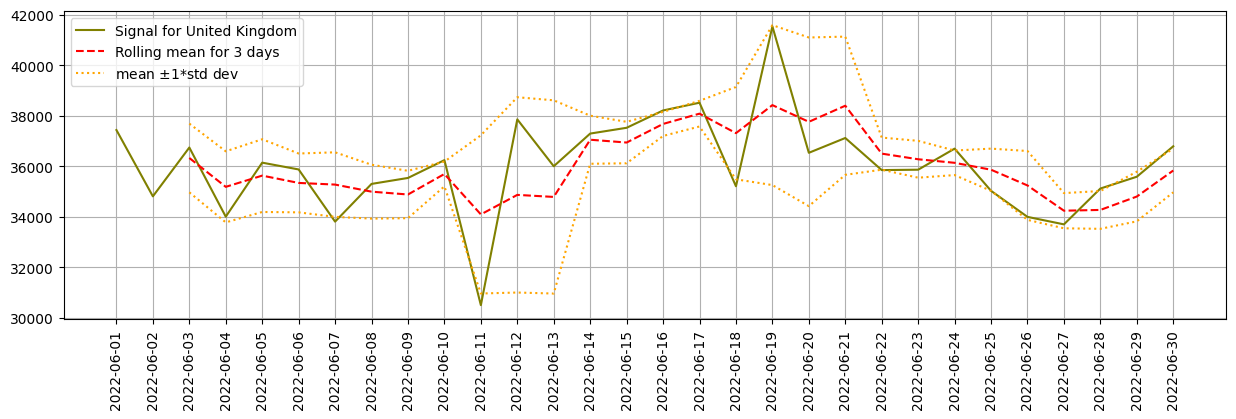

In [9]:
# Anomaly Detection using Bollinger Bands-adjacent method
fig , ax = plt.subplots(figsize = (15,4))

rate = 3
tolerance = 1
ax.plot(ts_2 , c = 'olive' , label = f'Signal for {ts_1.name}');
ax.plot(ts_2.rolling(rate).mean() , lw = 1.5 , ls = "--" , c = 'red' , label = f'Rolling mean for {rate} days');
ax.plot(ts_2.rolling(rate).mean() + tolerance*ts_2.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange' , label = f'mean $\pm${tolerance}*std dev');
ax.plot(ts_2.rolling(rate).mean() - tolerance*ts_2.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange');
ax.legend(loc='upper left');
ax.grid();
ax.set_xticks(ts_2.index);
ax.set_xticklabels(labels = ts_2.index, rotation = 90);

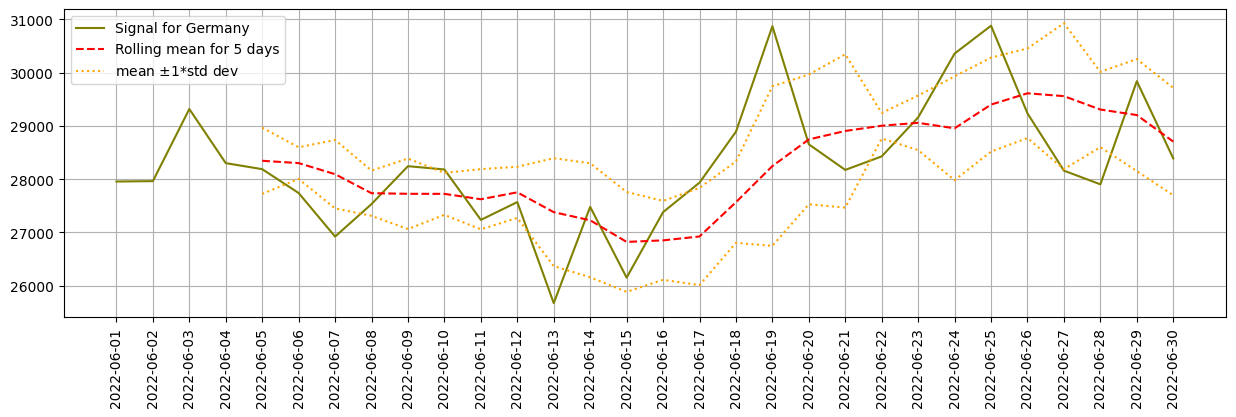

In [10]:
# Anomaly Detection using Bollinger Bands-adjacent method
fig , ax = plt.subplots(figsize = (15,4))

rate = 5
tolerance = 1
ax.plot(ts_3 , c = 'olive' , label = f'Signal for {ts_3.name}');
ax.plot(ts_3.rolling(rate).mean() , lw = 1.5 , ls = "--" , c = 'red' , label = f'Rolling mean for {rate} days');
ax.plot(ts_3.rolling(rate).mean() + tolerance*ts_3.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange' , label = f'mean $\pm${tolerance}*std dev');
ax.plot(ts_3.rolling(rate).mean() - tolerance*ts_3.rolling(3).std() , lw = 1.5 , ls = ":" , c = 'orange');
ax.legend(loc='upper left');
ax.grid();
ax.set_xticks(ts_2.index);
ax.set_xticklabels(labels = ts_2.index, rotation = 90);

From the above graph, the following days stand out as days of 'anomalous' activity
- 24th June in United Kingdom
- 19th June in France
- 25th June in Germany

### **QUESTION 2**

Characterise each of these three days by <br/>
a. Making a word cloud from the tweet text. [5 marks] <br/>
b. Any other method. [5 marks]

In [11]:
%%time

# File-Reading
path = os.path.join(os.getcwd() , out_file_for_text) # from utils

print(f'the path is -> {path}')

ts = []
tweets = []
country = []
full_text = []

with open(path , 'r' , encoding='utf-8') as in_file:
    for line in in_file:
        line = line.rstrip()
        tweet = line.split('|') # get reqd data in a list format
        # add into individual lists
        ts.append(tweet[0])
        tweets.append(tweet[1])
        country.append(tweet[2])
        full_text.append(tweet[3])
        
ts_convert = [datetime.datetime.fromtimestamp(int(dt)//1000) for dt in ts]

the path is -> c:\Users\soura\Documents\ECMM443\Twitter_Coursework\all_june_2022_tweets.txt
CPU times: total: 38 s
Wall time: 42.8 s


In [12]:
%%time

twt_df = pd.DataFrame(list(zip(tweets , ts_convert , country , full_text)) , columns = ['tweet_id' , 'ts' , 'country' , 'text'])
twt_df = twt_df[twt_df['tweet_id']!="None"].drop_duplicates()
print(f'length of tweet -> {len(twt_df)}')

length of tweet -> 15033548
CPU times: total: 1min
Wall time: 1min 3s


In [13]:
restricted_country_df = twt_df.merge(pivoted_country_names , left_on = 'country' , right_on = 'name' , how = 'inner')
restricted_country_df = restricted_country_df[['ts' , 'en' , 'text']]#.dropna()

# Create a date column
restricted_country_df['ts_day'] = pd.to_datetime(restricted_country_df['ts']).dt.date

# restrict acc to dates and country
uk_df = restricted_country_df[
    (
        (restricted_country_df['en']=="United Kingdom")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-24").date())
    )
]

fr_df = restricted_country_df[
    (
        (restricted_country_df['en']=="France")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-19").date())
    )
]

gr_df = restricted_country_df[
    (
        (restricted_country_df['en']=="Germany")&(restricted_country_df['ts_day']==pd.to_datetime("2022-06-25").date())
    )
]

### **Create Word Cloud**

In [63]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy.lang.en.stop_words import STOP_WORDS as en_stop
from spacy.lang.de.stop_words import STOP_WORDS as gr_stop

lang_stopwords_list = list(fr_stop) + list(en_stop) + list(gr_stop)
final_stopwords_list = lang_stopwords_list + ['https','co','t','c','d','l','j','s',
'good','thank','day','year','week','today','amp','time','great','like','people','love',
'new','think','no','yes','going','need','work','right','know','look','got','m','thanks',
"I'm",'morning','hope','want','ve','way',"don't",'best','years','come','don','photo',
'Happy','thing','night','posted','better','X','Friday','let','lot','live','life','looking',
'Oh','London','world','weekend','lovely']

(-0.5, 399.5, 199.5, -0.5)

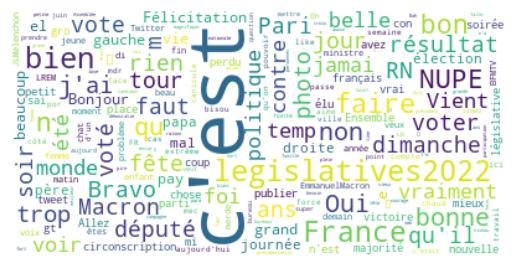

In [35]:
text = ' '.join(fr_df['text'].tolist())

word_cloud = WordCloud(stopwords = final_stopwords_list, collocations = False, background_color = 'white').generate(text)

fig , ax = plt.subplots()

ax.imshow(word_cloud, interpolation='bilinear')
ax.axis("off")

# Legislative elections in France were held on 12 and 19 June 2022 to elect the 577 members of the 16th National Assembly of the 
# Fifth French Republic.

(-0.5, 399.5, 199.5, -0.5)

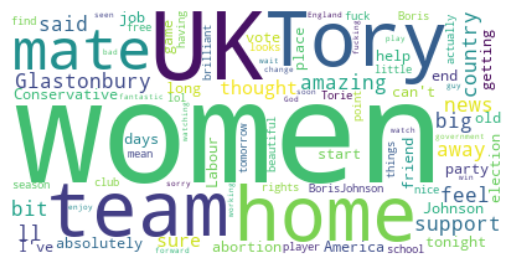

In [65]:
text = ' '.join(uk_df['text'].tolist())

word_cloud = WordCloud(stopwords = final_stopwords_list, collocations = False, background_color = 'white').generate(text)

fig , ax = plt.subplots()

ax.imshow(word_cloud, interpolation='bilinear')
ax.axis("off")

# America outlawed (??) abortion - Solidarity posts?

(-0.5, 399.5, 199.5, -0.5)

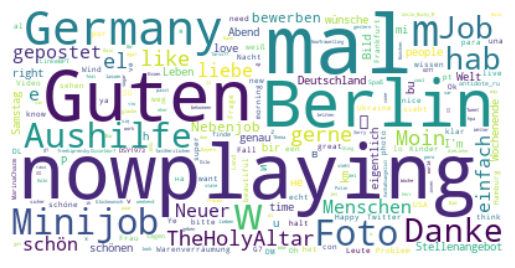

In [37]:
text = ' '.join(gr_df['text'].tolist())

word_cloud = WordCloud(stopwords = final_stopwords_list, collocations = False, background_color = 'white').generate(text)

fig , ax = plt.subplots()

ax.imshow(word_cloud, interpolation='bilinear')
ax.axis("off")

# Legislative elections in France were held on 12 and 19 June 2022 to elect the 577 members of the 16th National Assembly of the Fifth French Republic.